In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../input/up-crime-data-year-2019/MR data - Compiled Data Set.csv')
df.drop(['Text','Title'],axis=1,inplace=True)
df.columns = [i for i in range(0,len(df.columns))]
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10
0,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,10",NaN,3.0
1,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,1.0
7,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,1.0,NaN
8,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df=df.fillna(0)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0.0,3.0
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [4]:
dict={0:0,'Property Disputes':1,'Family Dispute':2,'Petty Quarrels':3,'Money Disputes':4, 'Personal Vendetta':5, 'Love Affairs':6, 'Casteism':7,'Unknown reasons':8}

In [5]:
df[1]=df[1].apply(lambda x : dict[x])
df.head(15)

,0,1,2,3,4,5,6,7,8,9,10
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0.0,3.0
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
5,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
6,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.0,1.0
7,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,9,1.0,0.0
8,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
9,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [6]:
df[11]=0
df[12]=0
for i in range(0,len(df)):
    if ',' in str(df.iloc[i,8]):
        cl=df.iloc[i,8].split(',')
        df.iloc[i,8]=int(cl[0])
        df.iloc[i,11]=int(cl[1])
        if len(cl)>2:
            df.iloc[i,12]=int(cl[2])
    elif int(df.iloc[i,8])>100:
        df.iloc[i,11]=int(df.iloc[i,8])%100
        df.iloc[i,8]=int(df.iloc[i,8])//100

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.0,3.0,10,0
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0
4,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0


In [8]:
from matplotlib import pyplot as plt
import numpy as np

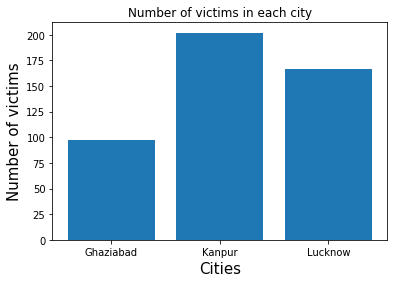

In [9]:
# number of crimes per city
crime_no=df[0].value_counts(sort=False)
cities=["Ghaziabad","Kanpur","Lucknow"]
plt.bar(cities,crime_no)
plt.title("Number of victims in each city")
plt.xlabel("Cities",fontsize=15)
plt.ylabel("Number of victims",fontsize=15)
plt.show()

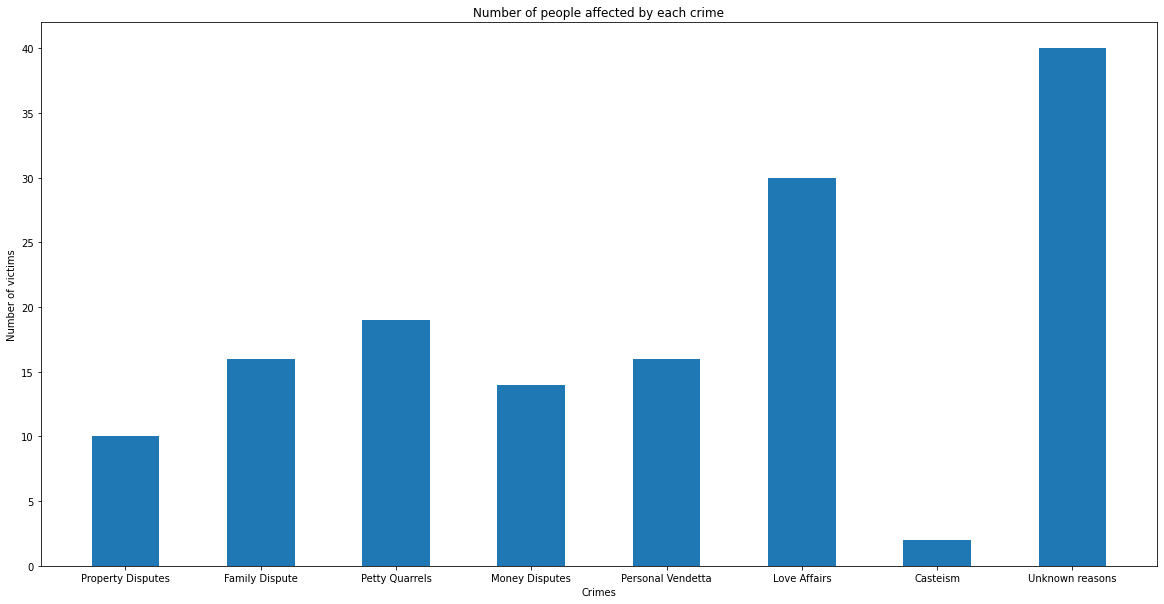

In [10]:
# people affected by each crime

a=df[1].value_counts(sort=False,ascending=True)
a.reset_index(drop='true')
reason=['Property Disputes','Family Dispute','Petty Quarrels','Money Disputes','Personal Vendetta','Love Affairs','Casteism','Unknown reasons']
plt.figure(figsize=(20,10))
plt.bar(reason,a[1:9],0.5)
plt.title("Number of people affected by each crime")
plt.xlabel("Crimes")
plt.ylabel("Number of victims")
plt.show()
